In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [81]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [82]:
# MOAR FEATURES
new_features_df = pd.DataFrame()
new_features_df['Senior'] = np.where(df['agea']>=65, 1, 0)
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
new_features_df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
new_features_df['tvtot'] = df['tvtot']
new_features_df['school_meet_happy'] = df['happy'] * df['sclmeet']
new_features_df['activity_happy'] = df['sclact'] * df['happy']

In [90]:
df['school_meet_happy'] = df['happy'] * df['sclmeet']
df['activity_happy'] = df['sclact'] * df['happy']
df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
df['Senior'] = np.where(df['agea']>=65, 1, 0)


In [83]:
new_X = new_features_df

In [91]:
new_X_train, new_y_train = X[:offset], y[:offset]
new_X_test, new_y_test = X[offset:], y[offset:]

In [59]:
newer_X.fillna(method='ffill', inplace=True)

In [55]:
newer_X = pd.concat([new_X, X], axis=1)

In [92]:
params = {'n_estimators': 800,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(new_X_train, new_y_train)

predict_train = clf.predict(new_X_train)
predict_test = clf.predict(new_X_test)

# Accuracy tables.
table_train = pd.crosstab(new_y_train, predict_train, margins=True)
table_test = pd.crosstab(new_y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.01175026306559102
Percent Type II errors: 0.07944580848824974

Test set accuracy:
Percent Type I errors: 0.08588957055214724
Percent Type II errors: 0.18691206543967281


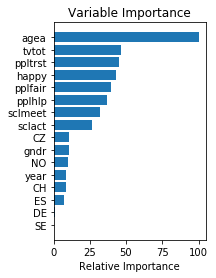

In [93]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Challenge questions

## Questions
- Predict the running times of prospective Olympic sprinters using data from the last 20 Olympics.
   - Linear Regression, for predicting the continuous variable of running times.
- You have more features (columns) than rows in your dataset.
   - Lasso Regression, using the built in optimiation to reduce the features to only those that influence the outcome.
- Identify the most important characteristic predicting likelihood of being jailed before age 20.
   - Logistic Regression, comparing the different odds predictions to identify the most influential variable.
- Implement a filter to “highlight” emails that might be important to the recipient
   - Naive Bayes filter using positive words instead of negative. 
- You have 1000+ features.
   - Lasso Regression, for its embedded feature reduction qualities.
- Predict whether someone who adds items to their cart on a website will purchase the items.
   - Funnel analysis, using Logistic Regression to predict customer behavior in each step.
- Your dataset dimensions are 982400 x 500
   - Linear Regression, watching for multicolinearity, or Lasso Regression for its built in feature reduction.
- Identify faces in an image.
   - Random Forest classifier, although deep learning work best for this now.
- Predict which of three flavors of ice cream will be most popular with boys vs girls.
   - KNN Classifier works best when distinguishing between multiple categories.